In [47]:
import pandas as pd
import glob
import re
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

import pandas_datareader as pdr

import requests_cache
session = requests_cache.CachedSession(cache_name='stocks-cache', backend='sqlite')

symbols = ['CL=F', 'BTC-USD', 'RUB=X', 'GC=F', '^GSPC', '^IXIC']

ticks = [
    pdr.DataReader(
        sym,
        start='2014-01-01',
        end='2020-05-01',
        data_source='yahoo',
        session=session
    ).Close.fillna(method='ffill').rename(sym)
    for sym in symbols
]

ticks = [t[~t.index.duplicated()] for t in ticks]

ticks_df = pd.concat(ticks, join='inner', axis=1)
ticks_df = ticks_df[~(ticks_df < 1).any(axis=1)]

change_df = ticks_df.pct_change().dropna()
change_df.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,BTC-USD,RUB=X,GC=F,^GSPC,^IXIC
CL=F,1.000000,0.000159,-0.211876,0.096899,0.120218,0.101455
BTC-USD,0.000159,1.000000,-0.029105,0.019941,0.109061,0.102011
RUB=X,-0.211876,-0.029105,1.000000,-0.051293,-0.131074,-0.127754
GC=F,0.096899,0.019941,-0.051293,1.000000,-0.048134,-0.052619
^GSPC,0.120218,0.109061,-0.131074,-0.048134,1.000000,0.959762
^IXIC,0.101455,0.102011,-0.127754,-0.052619,0.959762,1.000000


In [48]:
change_df = ticks_df.rolling(5).sum().dropna().pct_change().dropna()
change_df.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,BTC-USD,RUB=X,GC=F,^GSPC,^IXIC
CL=F,1.000000,0.086011,-0.413454,0.080145,0.354026,0.296728
BTC-USD,0.086011,1.000000,-0.080126,0.062810,0.177097,0.181907
RUB=X,-0.413454,-0.080126,1.000000,-0.099211,-0.351818,-0.315893
GC=F,0.080145,0.062810,-0.099211,1.000000,0.043839,0.014652
^GSPC,0.354026,0.177097,-0.351818,0.043839,1.000000,0.954748
^IXIC,0.296728,0.181907,-0.315893,0.014652,0.954748,1.000000


In [49]:
nticks = (ticks_df-ticks_df.mean())/ticks_df.std()
nticks.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,BTC-USD,RUB=X,GC=F,^GSPC,^IXIC
CL=F,1.000000,0.301941,-0.665524,-0.076091,0.313798,0.253983
BTC-USD,0.301941,1.000000,0.065245,0.606384,0.838919,0.833857
RUB=X,-0.665524,0.065245,1.000000,0.184118,0.114210,0.178153
GC=F,-0.076091,0.606384,0.184118,1.000000,0.687336,0.710931
^GSPC,0.313798,0.838919,0.114210,0.687336,1.000000,0.991147
^IXIC,0.253983,0.833857,0.178153,0.710931,0.991147,1.000000


In [50]:
change_df = ticks_df[ticks_df.index < '2017-01-01'].rolling(5).sum().pct_change().dropna()
change_df.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,BTC-USD,RUB=X,GC=F,^GSPC,^IXIC
CL=F,1.000000,0.035747,-0.466252,-0.074728,0.387988,0.344987
BTC-USD,0.035747,1.000000,-0.129088,-0.086469,0.061517,0.071176
RUB=X,-0.466252,-0.129088,1.000000,-0.029590,-0.353168,-0.308580
GC=F,-0.074728,-0.086469,-0.029590,1.000000,-0.205004,-0.260066
^GSPC,0.387988,0.061517,-0.353168,-0.205004,1.000000,0.956612
^IXIC,0.344987,0.071176,-0.308580,-0.260066,0.956612,1.000000


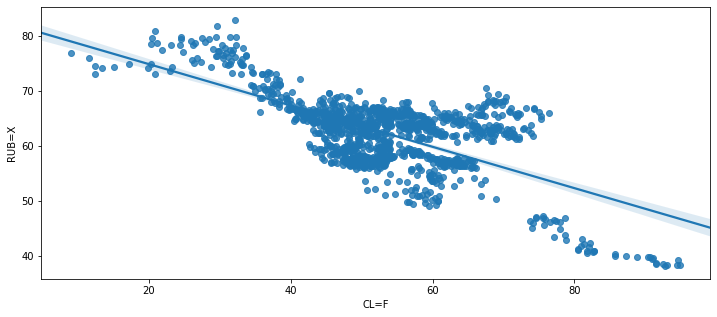

In [51]:
with mpl.rc_context() as rc:
    mpl.rc('figure', figsize=(12,5))
    sns.regplot(x='CL=F', y='RUB=X', data=ticks_df, order=1)

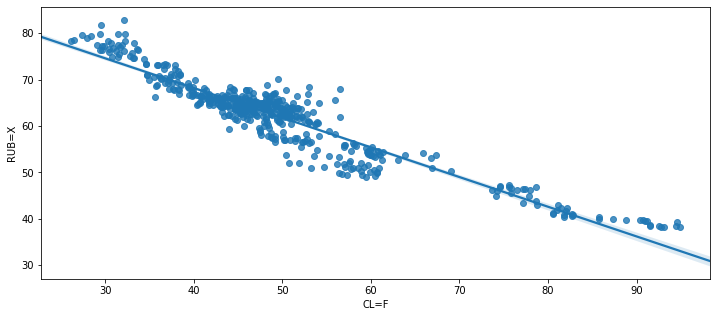

In [53]:
with mpl.rc_context() as rc:
    mpl.rc('figure', figsize=(12,5))
    sns.regplot(x='CL=F', y='RUB=X', data=ticks_df.loc['2014-01-01': '2017-01-01'], order=1)

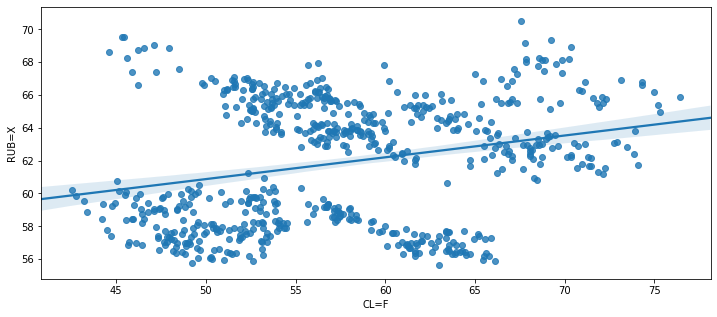

In [54]:
with mpl.rc_context() as rc:
    mpl.rc('figure', figsize=(12,5))
    sns.regplot(x='CL=F', y='RUB=X', data=ticks_df.loc['2017-01-01': '2020-01-01'], order=1)